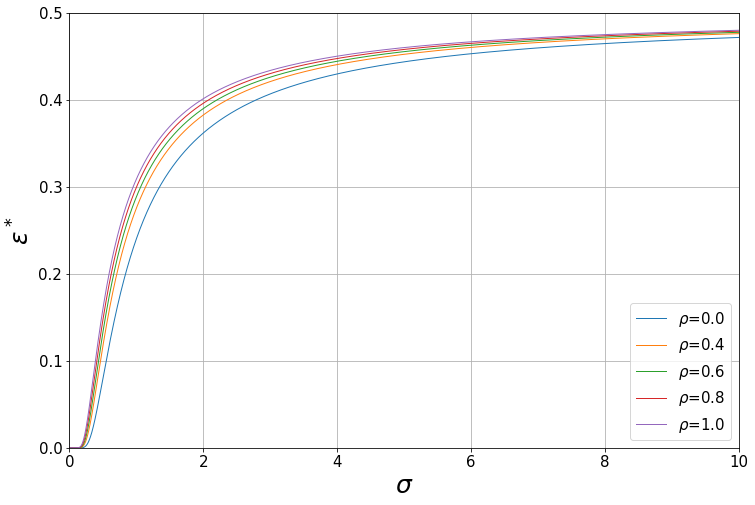

In [1]:
#---Problem 1.b python--- 
import math 
import numpy as np
import pylab
from pylab import figure, axes, pie, title, show
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm


sigma=np.linspace(0.00000000001,10,10000)
rho=[0,0.4,0.6,0.8,1]  #input rho
x=[[]for i in range(len(rho))]
for i in range (len(rho)):
    x[i]=norm.cdf(-1/(math.sqrt(2)*sigma*math.sqrt(1+rho[i]))) #CDF
    

f, ax= plt.subplots(1, 1) 

line=[[]for i in range(len(rho))]
for i in range(len(rho)):
    line[i], =ax.plot(sigma,x[i],linewidth=1,label=r'$\rho$=%.1f' %rho[i]) #plot
    #plt.plot(sigma,x[i],linewidth=1)
    
   
plt.legend(handles=[line[0],line[1],line[2],line[3],line[4]], loc=4, fontsize=15)
plt.xlabel("$\sigma$",fontsize=25)
plt.ylabel("$\epsilon^*$",fontsize=25)
ax.tick_params(labelsize=15)   
ax.set_xlim([0,10])
ax.set_ylim([0,0.5])
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.grid()
plt.show()

#fig.savefig('pic_1b.png',dpi=150)


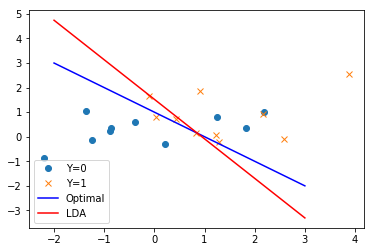

In [11]:
#---Problem 1.c python---
import math 
import numpy as np
import pylab
from pylab import figure, axes, pie, title, show
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm



mu0=np.array([0,0])
mu1=np.array([1,1])
sigma=np.matrix([[1,0.2],[0.2,1]])
R_mu0=10 #[P(Y=1)=P(Y=0)=1/2,sample size=20]
R_mu1=10
N=20
x0 = np.random.multivariate_normal(mu0,sigma,R_mu0).T #Multivariate Gaussian random variable
x1 = np.random.multivariate_normal(mu1,sigma,N-R_mu0).T
#print(x0)
#print(x1)
Y0, =plt.plot(x0[0],x0[1],'o') #plot mu0 MGRV
Y1, =plt.plot(x1[0],x1[1],'x')

#------Optimal classifier------
from numpy import *
a=sigma.I*(mat(mu1).T-mat(mu0).T)
b=-0.5*(mat(mu1).T-mat(mu0).T).T*sigma.I*(mat(mu1).T+mat(mu0).T)

X1=np.linspace(-2,3)
X2=-float(a[0])/float(a[1])*X1-float(b)/float(a[1])
# X2=-X1+1
Optimal, =plt.plot(X1,X2,color='b')
#------LDA classifier------
muh0=mat([mean(x0[0]),mean(x0[1])])
muh1=mat([mean(x1[0]),mean(x1[1])])
A = cov(x0)*(R_mu0/(R_mu0+R_mu1)) #mu_hat0
B = cov(x1)*(R_mu1/(R_mu0+R_mu1)) #mu_hat1
sigma = mat(A+B) #Sigma_hat
a=sigma.I*(muh1-muh0).T
b=-0.5*(muh1-muh0)*sigma.I*(muh1+muh0).T
X2=-float(a[0])/float(a[1])*X1-float(b)/float(a[1]) #g(x) = a1*x1 + a2*x2 + b = 0
LDA_p, =plt.plot(X1,X2,color='r')

#--------
plt.legend(handles=[Y0,Y1,Optimal,LDA_p],labels=['Y=0','Y=1','Optimal','LDA'])
fig=plt.gcf()
fig.savefig('pic_1c.png',dpi=150)
plt.show()

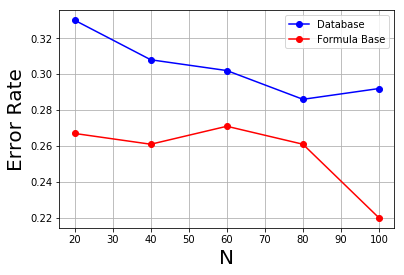

In [3]:
#---project 1.d python---
import math 
import numpy as np
import pylab
from pylab import figure, axes, pie, title, show
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from numpy import *

#---LDA & theo-error---
def LDA(x0,x1,Rmu0,Rmu1):
    muh0=mat([mean(x0[0]),mean(x0[1])]) #mu_hat0
    muh1=mat([mean(x1[0]),mean(x1[1])]) #mu_hat1
    A = cov(x0)*(R_mu0/(R_mu0+R_mu1))
    B = cov(x1)*(R_mu1/(R_mu0+R_mu1))
    sigma = mat(A+B) #Sigma_hat
    an=sigma.I*(muh1-muh0).T
    bn=-0.5*(muh1-muh0)*sigma.I*(muh1+muh0).T
    #---theoretical estimated error of LDA classifier----
    muh0_error=float(an.T*muh0.T+bn)/float(math.sqrt(an.T*sigma*an))
    muh1_error=-float(an.T*muh1.T+bn)/float(math.sqrt(an.T*sigma*an))
    estimated_error=0.5*(norm.cdf(muh0_error)+norm.cdf(muh1_error))    
    return an,bn,estimated_error


mu0=np.array([0,0])
mu1=np.array([1,1])
sigma=np.matrix([[1,0.2],[0.2,1]])
N=20
R_mu0=int(0.5*N) #[P(Y=1)=P(Y=0)=1/2,sample size=20]
R_mu1=int(0.5*N)
#clf = LinearDiscriminantAnalysis()
'''
gs_20_x0 = np.random.multivariate_normal(mu0,sigma,R_mu0).T #Multivariate Gaussian random variable
gs_20_x1 = np.random.multivariate_normal(mu1,sigma,N-R_mu0).T
data20=LDA(gs_20_x0,gs_20_x1,10,10)
a=tuple(data20[0])
X1=linspace(-2,3)
X2=-float(a[0])/float(a[1])*X1-float(b)/float(a[1])
gs_40_x0=np.random.multivariate_normal(mu0,sigma,20).T
gs_40_x1=np.random.multivariate_normal(mu1,sigma,20).T
data40=LDA(gs_40_x0,gs_40_x1,20,20)
gs_60_x0=np.random.multivariate_normal(mu0,sigma,30).T
gs_60_x1=np.random.multivariate_normal(mu1,sigma,30).T
data60=LDA(gs_60_x0,gs_60_x1,30,30)
gs_80_x0=np.random.multivariate_normal(mu0,sigma,40).T
gs_80_x1=np.random.multivariate_normal(mu1,sigma,40).T
data80=LDA(gs_80_x0,gs_80_x1,40,40)
gs_100_x0=np.random.multivariate_normal(mu0,sigma,50).T
gs_100_x1=np.random.multivariate_normal(mu1,sigma,50).T
data100=LDA(gs_100_x0,gs_100_x1,50,50)
gs_500_x0=np.random.multivariate_normal(mu0,sigma,250).T
gs_500_x1=np.random.multivariate_normal(mu1,sigma,250).T
data500=LDA(gs_500_x0,gs_500_x1,250,250)
'''

ac20=0.33
ac40=0.308
ac60=0.302
ac80=0.286
ac100=0.292
ac_error=[ac20,ac40,ac60,ac80,ac100]
theo20=0.267
theo40=0.261
theo60=0.271
theo80=0.261
theo100=0.22
theo_error=[theo20,theo40,theo60,theo80,theo100]
n=[20,40,60,80,100]

AC_E,=plt.plot(n,ac_error,marker='o',color='b')
THEO_E,=plt.plot(n,theo_error,marker='o',color='r')
plt.xlabel("N",fontsize=20)
plt.ylabel("Error Rate",fontsize=20)
plt.legend(handles=[AC_E, THEO_E],labels=['Database','Formula Base'])
plt.grid()
fig=plt.gcf()
fig.savefig('pic_1d.png',dpi=150)
plt.show()

In [2]:
#---project 1.d python---
import math 
import numpy as np
import pylab
from pylab import figure, axes, pie, title, show
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from numpy import *

#---LDA & theo-error---
def LDA(x0,x1,Rmu0,Rmu1):
    muh0=mat([mean(x0[0]),mean(x0[1])]) #mu_hat0
    muh1=mat([mean(x1[0]),mean(x1[1])]) #mu_hat1
    A = cov(x0)*(R_mu0/(R_mu0+R_mu1))
    B = cov(x1)*(R_mu1/(R_mu0+R_mu1))
    sigma = mat(A+B) #Sigma_hat
    an=sigma.I*(muh1-muh0).T
    bn=-0.5*(muh1-muh0)*sigma.I*(muh1+muh0).T
    #---theoretical estimated error of LDA classifier----
    muh0_error=float(an.T*muh0.T+bn)/float(math.sqrt(an.T*sigma*an))
    muh1_error=-float(an.T*muh1.T+bn)/float(math.sqrt(an.T*sigma*an))
    estimated_error=0.5*(norm.cdf(muh0_error)+norm.cdf(muh1_error))    
    return an,bn,estimated_error


mu0=np.array([0,0])
mu1=np.array([1,1])
sigma=np.matrix([[1,0.2],[0.2,1]])
N=20
R_mu0=int(0.5*N) #[P(Y=1)=P(Y=0)=1/2,sample size=20]
R_mu1=int(0.5*N)
#clf = LinearDiscriminantAnalysis()

gs_20_x0 = np.random.multivariate_normal(mu0,sigma,R_mu0).T #Multivariate Gaussian random variable
gs_20_x1 = np.random.multivariate_normal(mu1,sigma,N-R_mu0).T
data20=LDA(gs_20_x0,gs_20_x1,10,10)
a=tuple(data20[0])
X1=linspace(-2,3)
#X2=-float(a[0])/float(a[1])*X1-float(b)/float(a[1])
gs_40_x0=np.random.multivariate_normal(mu0,sigma,20).T
gs_40_x1=np.random.multivariate_normal(mu1,sigma,20).T
data40=LDA(gs_40_x0,gs_40_x1,20,20)
gs_60_x0=np.random.multivariate_normal(mu0,sigma,30).T
gs_60_x1=np.random.multivariate_normal(mu1,sigma,30).T
data60=LDA(gs_60_x0,gs_60_x1,30,30)
gs_80_x0=np.random.multivariate_normal(mu0,sigma,40).T
gs_80_x1=np.random.multivariate_normal(mu1,sigma,40).T
data80=LDA(gs_80_x0,gs_80_x1,40,40)
gs_100_x0=np.random.multivariate_normal(mu0,sigma,50).T
gs_100_x1=np.random.multivariate_normal(mu1,sigma,50).T
data100=LDA(gs_100_x0,gs_100_x1,50,50)

es_20=float(data20[1])
es_40=float(data40[1])
es_60=float(data60[1])
es_80=float(data80[1])
es_100=float(data100[1])


#---True error---
num020, num040, num060, num080,num0100=0,0,0,0,0
num120, num140, num160, num180, num1100= 0,0,0,0,0
for i in 



'''
ac20=0.29
ac40=0.308
ac60=0.302
ac80=0.292
ac100=0.283
ac_error=[ac20,ac40,ac60,ac80,ac100]
theo20=0.267
theo40=0.261
theo60=0.271
theo80=0.261
theo100=0.262
theo_error=[theo20,theo40,theo60,theo80,theo100]
n=[20,40,60,80,100]
'''
'''
AC_E,=plt.plot(n,ac_error,marker='o',color='b')
THEO_E,=plt.plot(n,theo_error,marker='o',color='r')
plt.xlabel("N",fontsize=20)
plt.ylabel("Error Rate",fontsize=20)
plt.legend(handles=[AC_E, THEO_E],labels=['Database','Formula Base'])
plt.grid()
fig=plt.gcf()
fig.savefig('pic_1d.png',dpi=150)
plt.show()
'''
l=[]

SyntaxError: invalid syntax (<ipython-input-2-07a2dac7572a>, line 65)